# Used Forest fire  Prediction
**Life cycle of Machine learning Project**

* Understanding the Problem Statement
* Data Collection
* Exploratory data analysis
* Data Cleaning
* Data Pre-Processing
* Model Training 
* Choose best model

# 1) Problem statement.

* This dataset comprises weather info in Bejaia Region and Sidi-Bel Abbes Region with multiple factor which lead to occure fire.
* If user can predict fire probabilty based on input features.

# 2) Data Collection.
* The Dataset is collected from UCI repository
* The data consists of 15 column and 245 rows.

# 2.1 Import Data and Required Packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import math 
import os
import sklearn as sk
import warnings 
import plotly.express as px
from six.moves import urllib
warnings.filterwarnings("ignore")

**Import the CSV Data as Pandas DataFrame**

In [3]:
data=pd.read_csv("C:/Users/admin/Downloads/Algerian_forest.csv")

**show top five record for data understanding**

In [4]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,country
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1


**Shape of the dataframe**

In [208]:
#data.drop(data.index[[122,123,124]], inplace = True)

In [5]:
data.shape

(244, 15)

In [6]:
data.dtypes

day              int64
month            int64
year             int64
Temperature      int64
 RH              int64
 Ws              int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
country          int64
dtype: object

In [7]:
data[['DC']]=data[['DC']].astype(float)

**Summary of the data set**

In [8]:
#Display summary statistics for a dataframe
data.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,country
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288115,4.774180,16.664754,7.006557,0.500000
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619662,4.175318,14.204824,7.438889,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.200000,0.500000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


**Drop columns which is not required**

In [9]:
data.drop(['day','month','year'], axis =1, inplace = True)

 **check datatypes in datasets**

In [10]:
 # Check Null and Dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  244 non-null    int64  
 1    RH          244 non-null    int64  
 2    Ws          244 non-null    int64  
 3   Rain         244 non-null    float64
 4   FFMC         244 non-null    float64
 5   DMC          244 non-null    float64
 6   DC           244 non-null    float64
 7   ISI          244 non-null    float64
 8   BUI          244 non-null    float64
 9   FWI          244 non-null    float64
 10  Classes      243 non-null    object 
 11  country      244 non-null    int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 23.0+ KB


# Exploratory Data

In [11]:
# define numerical & categorical columns
numeric_features = [feature for feature in data.columns if data[feature].dtype != 'O']
categorical_features = [feature for feature in data.columns if data[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 11 numerical features : ['Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'country']

We have 1 categorical features : ['Classes  ']


# Feature Information
Weather data observations
* **Temp :** temperature noon (temperature max) in Celsius degrees: 22 to 42
* **RH :** Relative Humidity in %: 21 to 90
* **Ws :**Wind speed in km/h: 6 to 29
* **Rain:** total day in mm: 0 to 16.8
FWI Components
* **Fine Fuel Moisture Code (FFMC) index from the FWI system:** 28.6 to 92.5
* **Duff Moisture Code (DMC) index from the FWI system:** 1.1 to 65.9
* **Drought Code (DC) index from the FWI system:** 7 to 220.4
* **Initial Spread Index (ISI) index from the FWI system:** 0 to 18.5
* **Buildup Index (BUI) index from the FWI system:** 1.1 to 68
* **Fire Weather Index (FWI) Index:** 0 to 31.1
* **Classes:** two classes, namely fire or not fire

In [13]:
# proportion of count data on categorical columns
for col in categorical_features:
    print(data[col].value_counts(normalize=True))
    print('---------------------------')

fire             0.539095
not fire         0.415638
fire             0.016461
fire             0.008230
not fire         0.008230
not fire         0.004115
not fire         0.004115
not fire         0.004115
Name: Classes  , dtype: float64
---------------------------


**Classes is our lable coloum**

# Univariate Analysis

* The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

# Numerical Features

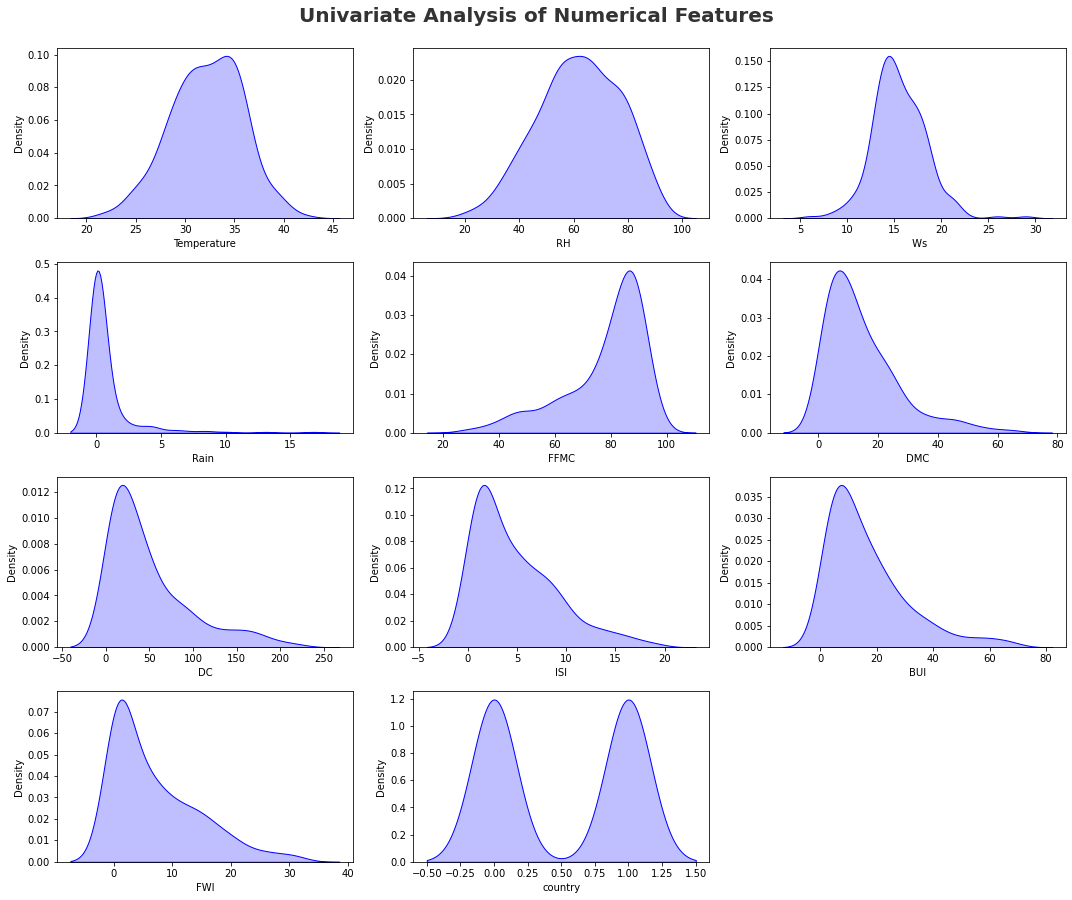

In [18]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=data[numeric_features[i]],shade=True, color='b')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

**Report**
* temperature, RH, Country showing normally disributed.
* DMC,DC, ISI, BUI, FWI showing log normal (right skewed) distrubution.
* Outliers in rain, WS.
* FFMC is showing left skewed distribution.

# Categorical Features

KeyError: 'Classes'

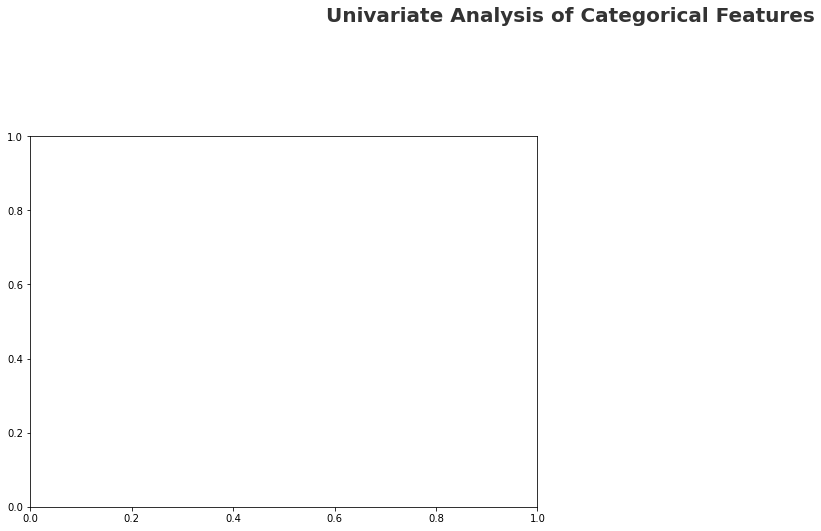

In [21]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
cat1 = ["Classes"]   # it will 
for i in range(0, len(cat1)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=data[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

# Multivariate Analysis

* Multivariate analysis is the analysis of more than one variable.

# Check Multicollinearity in Numerical features

In [22]:
data[(list(data.columns)[1:])].corr()

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,country
RH,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220330,-0.690637,-0.348587,-0.569997,0.406424
Ws,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076245,0.015248,0.029756,0.028799,0.176829
Rain,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296804,-0.347105,-0.299171,-0.322682,0.041080
FFMC,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503910,0.739730,0.589652,0.686033,-0.224680
DMC,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875358,0.674499,0.982073,0.874778,-0.191094
DC,-0.220330,0.076245,-0.296804,0.503910,0.875358,1.000000,0.498909,0.941904,0.740189,0.081489
ISI,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.498909,1.000000,0.635891,0.907461,-0.268421
BUI,-0.348587,0.029756,-0.299171,0.589652,0.982073,0.941904,0.635891,1.000000,0.857771,-0.087370
FWI,-0.569997,0.028799,-0.322682,0.686033,0.874778,0.740189,0.907461,0.857771,1.000000,-0.192451
country,0.406424,0.176829,0.041080,-0.224680,-0.191094,0.081489,-0.268421,-0.087370,-0.192451,1.000000


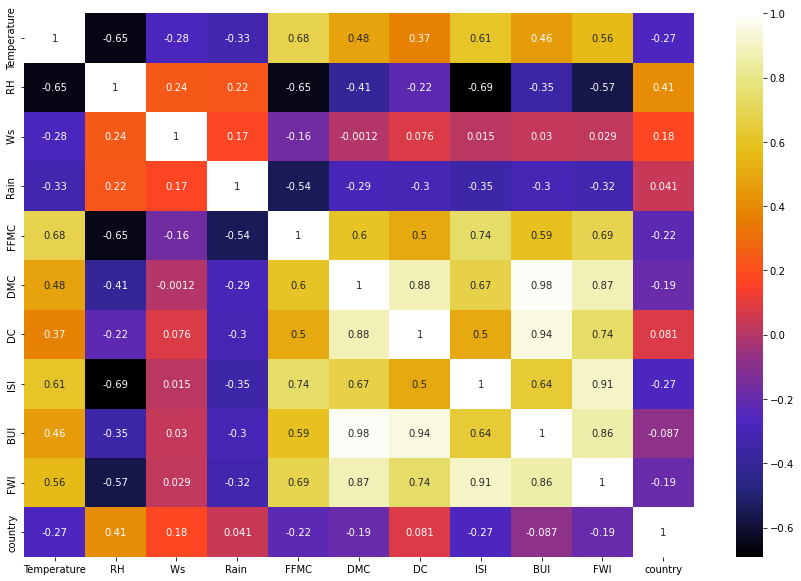

In [23]:
plt.figure(figsize = (15,10))
sns.heatmap(data.corr(), cmap="CMRmap", annot=True)
plt.show()

In [ ]:
**Report** 
* Our target column ProdTaken has a weak negative correlation on Age and MonthlyIncome.
* The NumberOfFollowups and Passport columns also have a weak positive correlation with ProdTaken.
* The NumberOfPersonVisiting and NumberOfChildrenVisiting columns have a strong enough positive correlation.